Objectives
The main goal of the case study is to build ML models to predict churn. The predictive model that you’re going to build will the following purposes:

- It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

- It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

- Even though overall accuracy will be your primary evaluation metric, you should also mention other metrics like precision, recall, etc. for the different models that can be used for evaluation purposes based on different business objectives. For example, in this problem statement, one business goal can be to build an ML model that identifies customers who'll definitely churn with more accuracy as compared to the ones who'll not churn. Make sure you mention which metric can be used in such scenarios.

- Recommend strategies to manage customer churn based on your observations.



### Steps

1. Data Understanding, Preparation and preprocessing
	- Identification of usefull attributes
	- Handling missing values
	- data imputation
	- Handling Outliers
	- Standardization of column values - homogeneous column types
2. Exploratory Data Analysis
	- Finding Correlation
	- Draw scatter plots - identification of linearity
	- Univariate and Bivariate Analysis - Boxplot, histograms
3. Feature Enginearing and Data transformation
	- Data derivations
	- Handling categorical variables - Dummy value creations
	- Handling Data Imbalance
	- Scaling data
4. Model Building

	a. Apply PCA
		- Getting the optimal value of PCA components
	b. MODEL-1 : Logistic Regression
		- Hypertuning : to get the optimal C value
		- Build Logistic model with optimal C value
		- Identifying optimal threshold value as per metrics - Sensitivity
		- Train set Predictions
		- Test set predictions
        - Kaggle test data predictions
	c. MODEL-2 - Decision Tree
		- Hypertuning parameters
		- Identifying best score and best parameters
		- Build model with optimal params
		- Predictions on train set
		- Predictions on test set
        - Kaggle test data predictions
	d. MODEL-3 -Building Random Forest
		- Hypertuning parameters
		- Identifying best score and best parameters
		- Build model with optimal params
		- Predictions on train set
		- Predictions on test set
        - Kaggle test data predictions
    e. Model-4 - Building XgBoost Model
		- Hypertuning parameters
		- Identifying best score and best parameters
		- Build model with optimal params
		- Predictions on train set
		- Predictions on test set
        - Kaggle test data predictions
     Final Insights


 - Objective 2 : Important Attributes
    - a. Regularization
        - Lasso
        - Ridge
    - b. Random Forest
        - Extracting Important features
    - c. Logistic Regression on Random Forest Important features

## Evaluation Criteria

- This is a classification problem, we need to analyse the result with confusion matrix and other metrics associated with it
- As per the problem statement we need to retain the churn customers
- Our focus shall be more on the churn customers than non-churn
- We cannot have the flexibility in misclassification of churn customers , 
however other way round if few non-churn customers are misclassified as churn thats not an issue 
- On the metrics we shall be focusing more on Sensitivity and recall than accuracy

In [1193]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import re

### For Auto EDA
import sweetviz as sv # For analyzing EDA automatically

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import IncrementalPCA
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss


import xgboost as xgb  # Load this xgboost
# Importing the relevant libraries
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1194]:
# setting the view of the rows and columns of dataset output

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [1195]:
## Reading the train set data

df_original = pd.read_csv('train.csv')
df_original.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [1196]:
## Getting the shape of the train data set

df_original.shape

(69999, 172)

In [1197]:
df_original.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

In [1198]:
# view the column summary
df_original.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

### insights
- Most columns are numerical
- Will analyze more on the non-numerical columns and create dummy variables if required 

In [1199]:
# Loading the Kaggle test data set
df_test = pd.read_csv('test.csv')
df_test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [1200]:
# shape of kaggle test dataset
df_test.shape

(30000, 171)

In [1201]:
# storing the id column of the kaggle test dataset
id = df_test['id']

### Data Processing in the train set

In [1202]:
## removing the column id from train set
df_original.drop(columns='id', inplace=True)

In [1203]:
df_original.drop(columns='circle_id', inplace=True)

### Insight
- id and circle_id columns only contains values for idebtification and do not contribute towards predictions
- We have drop these columns

In [1204]:
## Performing the same preprocessing steps in kaggle test data set - removing the column id from test set
df_test.drop(columns='id', inplace=True)
df_test.drop(columns='circle_id', inplace=True)

## Handling missing values

### Removing rows having all null values

In [1205]:
# storing the initial number of rows in a variable
initial_no_of_rows = (df_original.shape)[0]
print('Initial number of rows in train set - ', initial_no_of_rows)

Initial number of rows in train set -  69999


In [1206]:
# removing rows having all null values

print('Shape of train data set BEFORE dropna - ', df_original.shape)
df_original.dropna(how='all', inplace=True)
print('Shape of train data set AFTER dropna - ', df_original.shape)

Shape of train data set BEFORE dropna -  (69999, 170)
Shape of train data set AFTER dropna -  (69999, 170)


### insight
- There are no rows which has all null values
- We shall analyze the null values for each column and handle it

In [1207]:
## checking null value for train set

train_null_values = round(((df_original.isnull().sum()/len(df_original))*100),2).to_frame('null_percent').sort_values(by='null_percent',ascending=False)
train_null_values

,null_percent
total_rech_data_6,74.90
night_pck_user_6,74.90
arpu_2g_6,74.90
arpu_3g_6,74.90
av_rech_amt_data_6,74.90
count_rech_3g_6,74.90
max_rech_data_6,74.90
count_rech_2g_6,74.90
date_of_last_rech_data_6,74.90
fb_user_6,74.90


### insight
- Few columns have high percent of null values
- Imputing data into these columns may differ the result
- We shall drop these columns

### Removing columns having high missing values

In [1208]:
# Getting the columns having more than 25% of null values

col_high_missing_values_df = train_null_values[train_null_values['null_percent'] > 25]
col_high_missing_values = col_high_missing_values_df.index
print(col_high_missing_values)

Index(['total_rech_data_6', 'night_pck_user_6', 'arpu_2g_6', 'arpu_3g_6',
       'av_rech_amt_data_6', 'count_rech_3g_6', 'max_rech_data_6',
       'count_rech_2g_6', 'date_of_last_rech_data_6', 'fb_user_6',
       'night_pck_user_7', 'date_of_last_rech_data_7', 'arpu_3g_7',
       'fb_user_7', 'av_rech_amt_data_7', 'count_rech_3g_7', 'count_rech_2g_7',
       'total_rech_data_7', 'max_rech_data_7', 'arpu_2g_7', 'count_rech_2g_8',
       'total_rech_data_8', 'count_rech_3g_8', 'av_rech_amt_data_8',
       'max_rech_data_8', 'arpu_3g_8', 'date_of_last_rech_data_8', 'arpu_2g_8',
       'fb_user_8', 'night_pck_user_8'],
      dtype='object')


In [1209]:
## Dropping the columns having more than 25% missing values
print('Initial shape of the train set - ', df_original.shape)
df_original = df_original.drop(columns=col_high_missing_values, axis=1)

print('Final shape of the train set post dropping high missing value columns - ', df_original.shape)

Initial shape of the train set -  (69999, 170)
Final shape of the train set post dropping high missing value columns -  (69999, 140)


### insight
- 30 columns has been removed from the data set

In [1210]:
# Dropping the same columns from the kaggle test set

## Dropping the columns from the test set
print('Initial shape of the test set - ', df_test.shape)
df_test = df_test.drop(columns=col_high_missing_values, axis=1)

print('Final shape of the test set post dropping high missing value columns - ', df_test.shape)

Initial shape of the test set -  (30000, 169)
Final shape of the test set post dropping high missing value columns -  (30000, 139)


### imputing 0 to null values

In [1211]:
# train set
df_original.fillna(0, inplace=True)

In [1212]:
# check the null value count

train_null_values = round(((df_original.isnull().sum()/len(df_original))*100),2).to_frame('null_percent').sort_values(by='null_percent',ascending=False)
train_null_values

,null_percent
loc_og_t2o_mou,0.0
isd_ic_mou_6,0.0
total_ic_mou_6,0.0
total_ic_mou_7,0.0
total_ic_mou_8,0.0
spl_ic_mou_6,0.0
spl_ic_mou_7,0.0
spl_ic_mou_8,0.0
isd_ic_mou_7,0.0
std_ic_mou_7,0.0


In [1213]:
# kaggale test data
df_test.fillna(0, inplace=True)

In [1214]:
## Analysing the date columns
non_num_columns = df_original.select_dtypes(include='object')
non_num_columns.head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,6/30/2014,7/31/2014,8/31/2014,6/22/2014,7/10/2014,8/24/2014
1,6/30/2014,7/31/2014,8/31/2014,6/12/2014,7/10/2014,8/26/2014
2,6/30/2014,7/31/2014,8/31/2014,6/11/2014,7/22/2014,8/24/2014
3,6/30/2014,7/31/2014,8/31/2014,6/15/2014,7/21/2014,8/25/2014
4,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/26/2014,8/30/2014


### insights
- the columns last_date_of_month_6, last_date_of_month_7 and last_date_of_month_8 have unique values and do not contribute much
- we shall be deleting these columns

### revoming columns having no data variation 

In [1215]:
## REmoving columns having 1 unique value from train set

print('Shape of train data set BEFORE removing unique value columns - ', df_original.shape)
single_unique_col = []
for col in df_original.columns:
    if df_original[col].nunique() == 1:
        single_unique_col.append(col)
        df_original.drop(columns=col, inplace=True)
        
        
print('Columns removed - ', single_unique_col)
print('Shape of train data set AFTER removing unique value columns - ', df_original.shape)

Shape of train data set BEFORE removing unique value columns -  (69999, 140)
Columns removed -  ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']
Shape of train data set AFTER removing unique value columns -  (69999, 130)


### insights
- 10 columns have been identified having a single unique value

In [1216]:
## Removing the columns from  kaggle test set
df_test.drop(single_unique_col, axis=1, inplace=True)
df_test.shape

(30000, 129)

In [1217]:
## checking null value for train set

train_null_values = round(((df_original.isnull().sum()/len(df_original))*100),2).to_frame('null_percent').sort_values(by='null_percent',ascending=False)
train_null_values

,null_percent
last_date_of_month_7,0.0
total_rech_amt_8,0.0
total_rech_amt_6,0.0
total_rech_num_8,0.0
total_rech_num_7,0.0
total_rech_num_6,0.0
ic_others_8,0.0
ic_others_7,0.0
ic_others_6,0.0
isd_ic_mou_8,0.0


### insight
- All null values have been handled

In [1218]:
### removing the date columns
df_original = df_original.select_dtypes(exclude=['object'])

In [1219]:
## removing date columns from Kaggle data set
df_test = df_test.select_dtypes(exclude=['object'])

In [1220]:
final_rows = (df_original.shape)[0]
final_rows

69999

In [1221]:
per_dropped_percent = ((initial_no_of_rows - final_rows)/initial_no_of_rows)*100
per_dropped_percent

0.0

In [1222]:
df_original.shape

(69999, 125)

In [1223]:
# Columns removed
172-125

47

### insight
- No rows has been removed in data processing
- 47 columns have been removed consisting of high null values, id colums and some date columns

# EDA

In [1224]:

sweet_report = sv.analyze(df_original,pairwise_analysis="off")
sweet_report.show_html('sweet_report.html')

Feature: churn_probability                   |█████████████████████████████████████████| [100%]   01:33 -> (00:00 left)


Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Function to draw plots as per variable type

In [1225]:
# create plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariate(variable, stats=True):
    print(f'-------------{data_type(variable)}----------')
    
    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")
        
def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.boxplot(var1, var2)

In [1226]:
df_original.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0,0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,352.91,0.00,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0,0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,70,50,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,882,0.0,0.0,0.0,0
3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.6,0.56,0.0,0.0,16.16,37.99,4.60,0.0,0.0,0.0,14.95,9.13,25.61,0.00,0.0,0.0,76.03,95.98,53.84,24.98,4.84,23.88,53.99,44.23,57.14,7.23,0.81,0.00,86.21,49.89,81.03,0.00,0.00,0.00,8.89,0.28,2.81,0.0,0.0,0.0,8.89,0.28,2.81,95.11,50.18,83.84,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,2,4,3,160,240,130,110,110,50,110,110,5

### Univariate Analysis

-------------numerical----------
count    69999.000000
mean         9.379276
std         56.260778
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2850.980000
Name: roam_ic_mou_6, dtype: float64


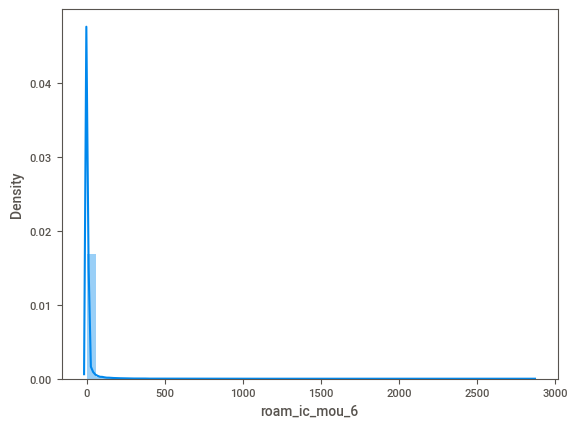

-------------numerical----------
count    69999.000000
mean       283.134365
std        334.213918
min      -2258.709000
25%         93.581000
50%        197.484000
75%        370.791000
max      27731.088000
Name: arpu_6, dtype: float64


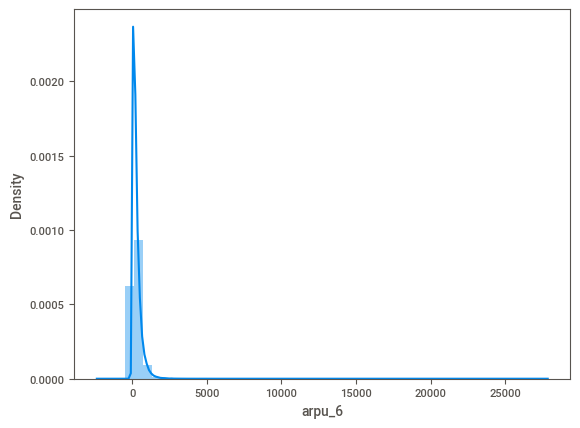

-------------numerical----------
count    69999.000000
mean       191.010582
std        312.900706
min          0.000000
25%         28.790000
50%         89.810000
75%        223.540000
max       8362.360000
Name: offnet_mou_6, dtype: float64


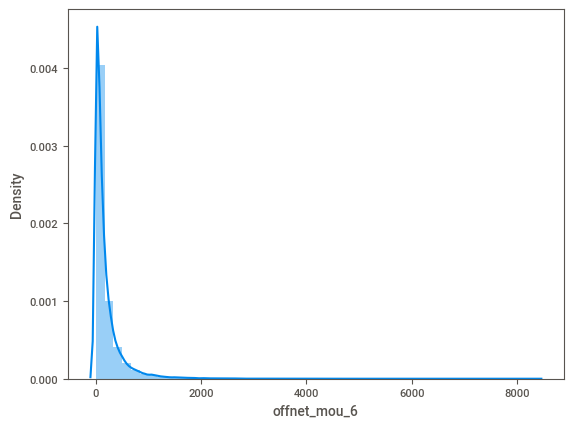

-------------numerical----------
count    69999.000000
mean       127.887939
std        295.115497
min          0.000000
25%          5.430000
50%         30.830000
75%        113.100000
max       7376.710000
Name: onnet_mou_6, dtype: float64


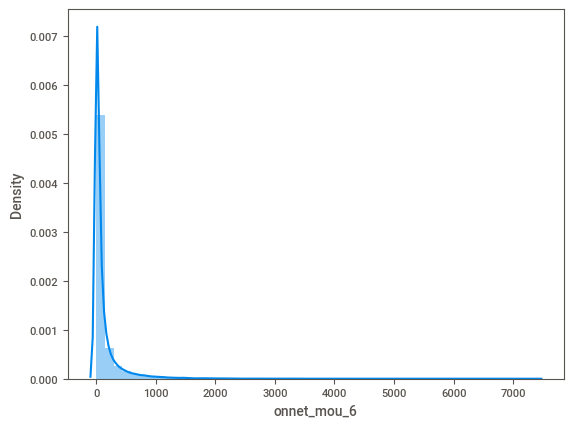

-------------numerical----------
count    69999.000000
mean         9.254848
std         62.923987
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       5337.040000
Name: roam_og_mou_8, dtype: float64


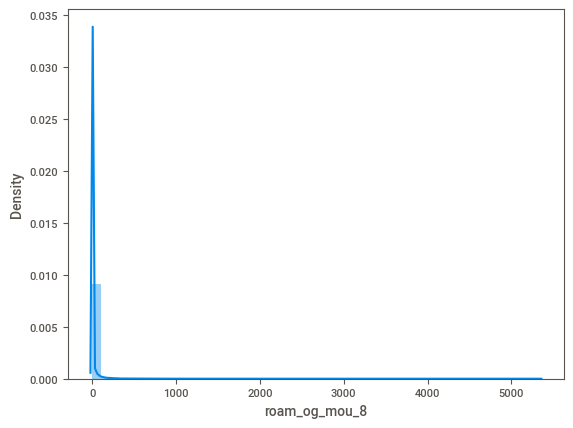

-------------numerical----------
count    69999.000000
mean        43.269280
std        149.944829
min          0.000000
25%          0.760000
50%         10.060000
75%         37.260000
max      10752.560000
Name: loc_og_t2t_mou_8, dtype: float64


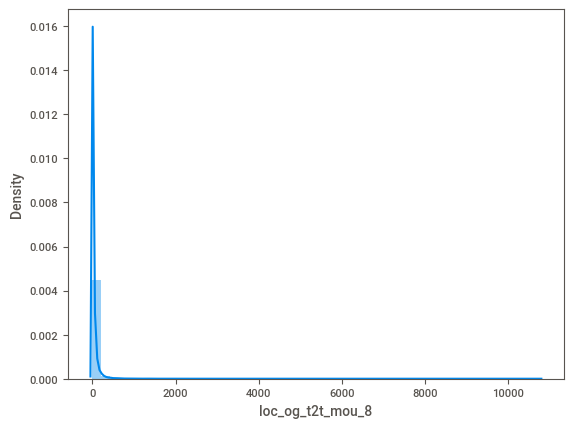

In [1227]:
cols = ['roam_ic_mou_6','arpu_6', 'offnet_mou_6', 'onnet_mou_6', 'roam_og_mou_8', 'loc_og_t2t_mou_8'  ]

for col in cols:
    univariate(df_original[col])
    plt.show()

### Bivariate Analysis

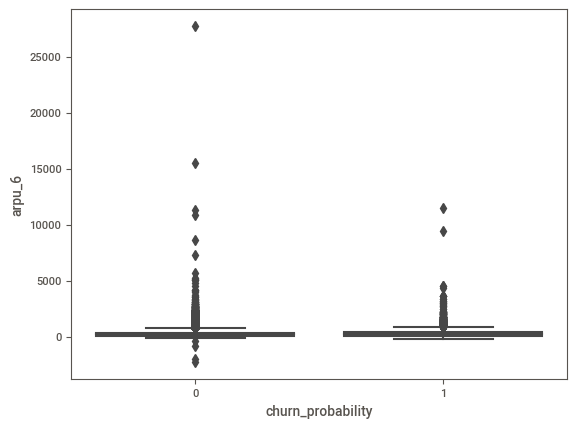

In [1228]:
# bivariate(df_original['arpu_6'], df_original['churn_probability'])
sns.boxplot(data=df_original,y=df_original['arpu_6'], x=df_original['churn_probability'])
plt.show()

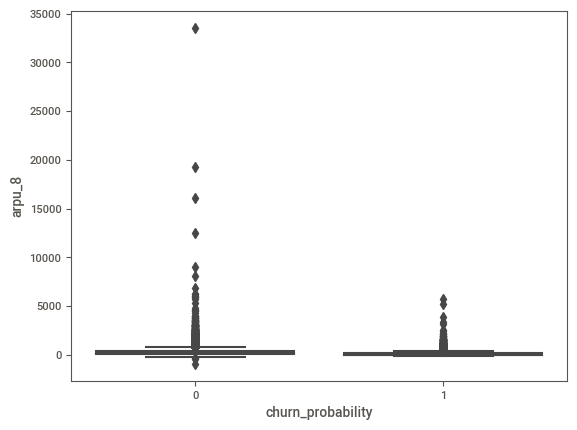

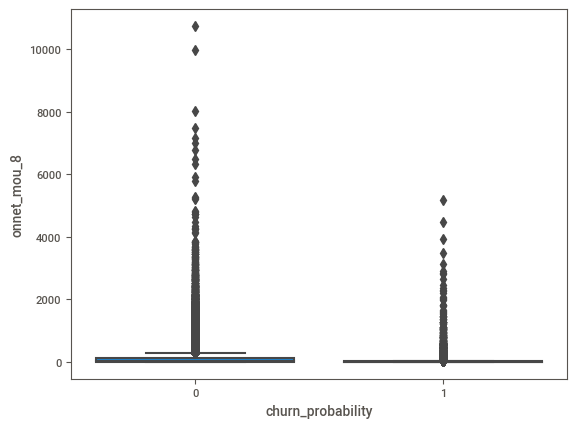

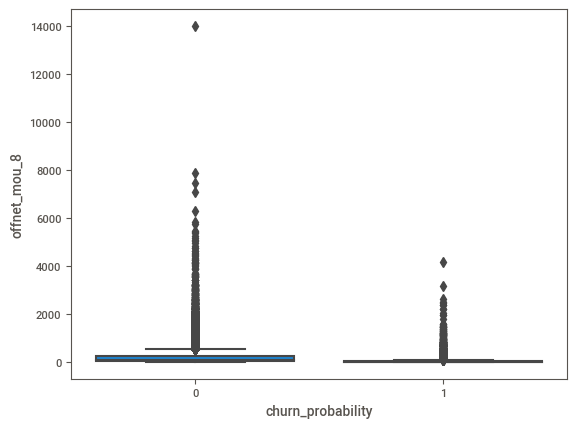

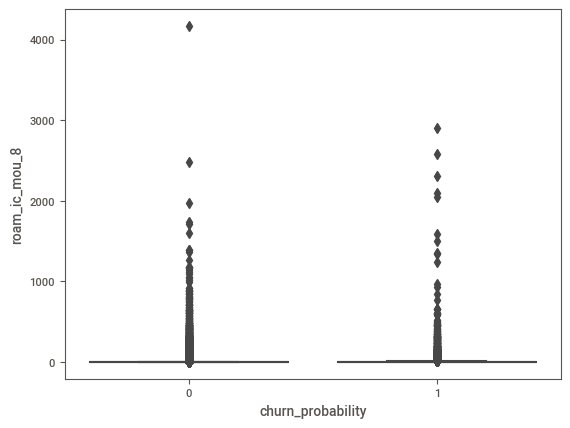

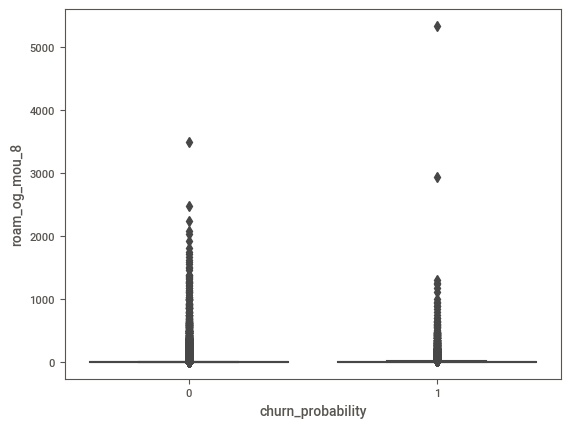

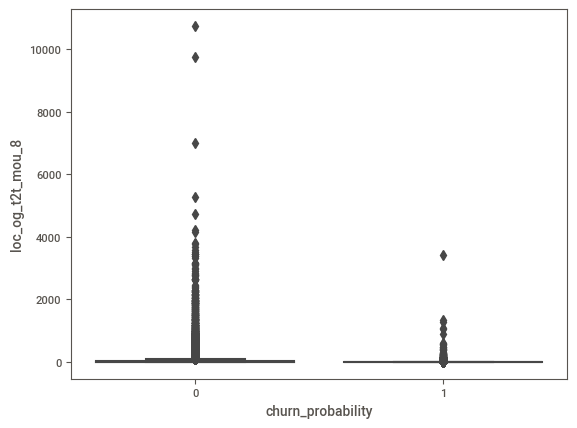

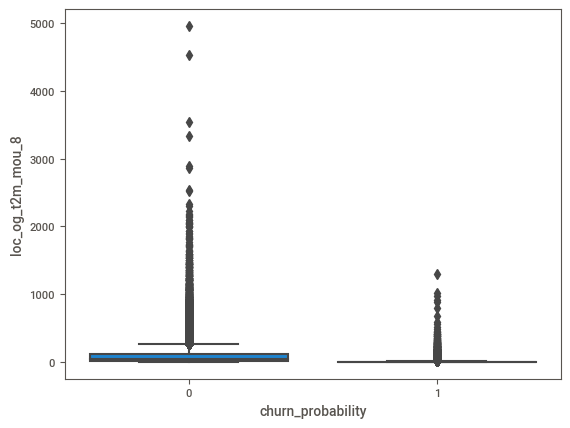

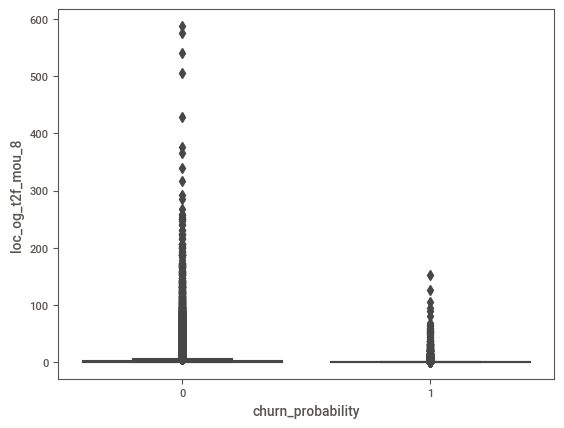

In [1229]:
columns = ['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8','loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8']

for col in columns:
    sns.boxplot(data=df_original,y=df_original[col], x=df_original['churn_probability'])
    plt.show()

<AxesSubplot: xlabel='offnet_mou_8', ylabel='arpu_8'>

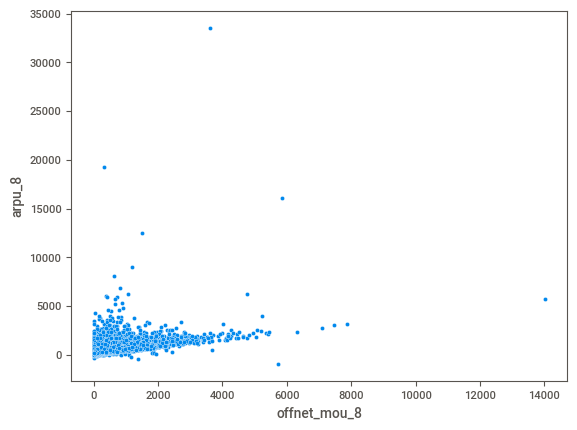

In [1230]:
sns.scatterplot(data=df_original, x='offnet_mou_8', y='arpu_8' )

<AxesSubplot: xlabel='onnet_mou_8', ylabel='arpu_8'>

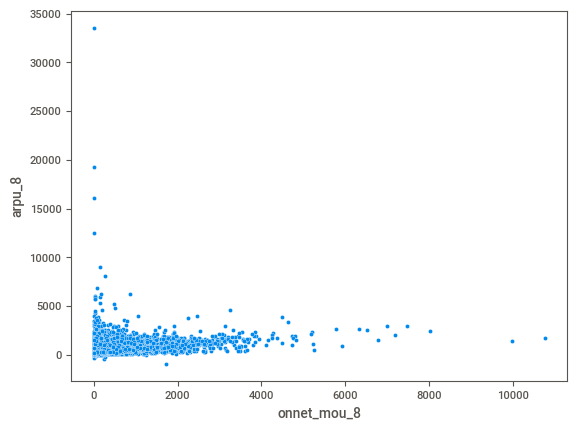

In [1231]:
sns.scatterplot(data=df_original, x='onnet_mou_8', y='arpu_8' )

<AxesSubplot: xlabel='offnet_mou_8', ylabel='onnet_mou_8'>

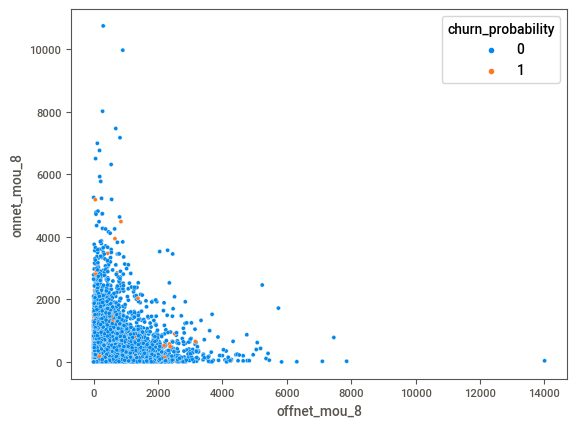

In [1232]:

sns.scatterplot(data=df_original, x='offnet_mou_8', y='onnet_mou_8', hue='churn_probability' )


## High Value Customers

In [1233]:
df_original['av_arpu'] = (df_original['arpu_6'] + df_original['arpu_7'] + df_original['arpu_8'])/3

In [1234]:

df_original.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,av_arpu
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0,0,41.937667
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,352.91,0.00,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0,0,55.246667
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,70,50,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,882,0.0,0.0,0.0,0,54.660667
3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.6,0.56,0.0,0.0,16.16,37.99,4.60,0.0,0.0,0.0,14.95,9.13,25.61,0.00,0.0,0.0,76.03,95.98,53.84,24.98,4.84,23.88,53.99,44.23,57.14,7.23,0.81,0.00,86.21,49.89,81.03,0.00,0.00,0.00,8.89,0.28,2.81,0.0,0.0,0.0,8.89,0.28,2.81,95.11,50.18,83.84,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,

In [1235]:
df_original.shape

(69999, 126)

In [1236]:
## 75 percentile

df = df_original.loc[df_original.av_arpu >= df_original.av_arpu.quantile(0.75), :]
df = df.reset_index(drop=True)
df.shape

(17500, 126)

### insight
- top 25 percentile are being recognized as high value customers depending on the average revenue

### Taking the differnce of avarege metrics for first two months with the last month 

In [1237]:
df['arpu_diff'] = df.arpu_8 - ((df.arpu_6 + df.arpu_7)/2)

df['onnet_mou_diff'] = df.onnet_mou_8 - ((df.onnet_mou_6 + df.onnet_mou_7)/2)

df['offnet_mou_diff'] = df.offnet_mou_8 - ((df.offnet_mou_6 + df.offnet_mou_7)/2)

df['roam_ic_mou_diff'] = df.roam_ic_mou_8 - ((df.roam_ic_mou_6 + df.roam_ic_mou_7)/2)

df['roam_og_mou_diff'] = df.roam_og_mou_8 - ((df.roam_og_mou_6 + df.roam_og_mou_7)/2)

df['loc_og_mou_diff'] = df.loc_og_mou_8 - ((df.loc_og_mou_6 + df.loc_og_mou_7)/2)

df['std_og_mou_diff'] = df.std_og_mou_8 - ((df.std_og_mou_6 + df.std_og_mou_7)/2)

df['isd_og_mou_diff'] = df.isd_og_mou_8 - ((df.isd_og_mou_6 + df.isd_og_mou_7)/2)

df['spl_og_mou_diff'] = df.spl_og_mou_8 - ((df.spl_og_mou_6 + df.spl_og_mou_7)/2)

df['total_og_mou_diff'] = df.total_og_mou_8 - ((df.total_og_mou_6 + df.total_og_mou_7)/2)

df['loc_ic_mou_diff'] = df.loc_ic_mou_8 - ((df.loc_ic_mou_6 + df.loc_ic_mou_7)/2)

df['std_ic_mou_diff'] = df.std_ic_mou_8 - ((df.std_ic_mou_6 + df.std_ic_mou_7)/2)

df['isd_ic_mou_diff'] = df.isd_ic_mou_8 - ((df.isd_ic_mou_6 + df.isd_ic_mou_7)/2)

df['spl_ic_mou_diff'] = df.spl_ic_mou_8 - ((df.spl_ic_mou_6 + df.spl_ic_mou_7)/2)

df['total_ic_mou_diff'] = df.total_ic_mou_8 - ((df.total_ic_mou_6 + df.total_ic_mou_7)/2)

df['total_rech_num_diff'] = df.total_rech_num_8 - ((df.total_rech_num_6 + df.total_rech_num_7)/2)

df['total_rech_amt_diff'] = df.total_rech_amt_8 - ((df.total_rech_amt_6 + df.total_rech_amt_7)/2)

df['max_rech_amt_diff'] = df.max_rech_amt_8 - ((df.max_rech_amt_6 + df.max_rech_amt_7)/2)

df['vol_2g_mb_diff'] = df.vol_2g_mb_8 - ((df.vol_2g_mb_6 + df.vol_2g_mb_7)/2)

df['vol_3g_mb_diff'] = df.vol_3g_mb_8 - ((df.vol_3g_mb_6 + df.vol_3g_mb_7)/2)

### Performing on kaggle test data

In [1238]:
df_test['av_arpu'] = (df_test['arpu_6'] + df_test['arpu_7'] + df_test['arpu_8'])/3

In [1239]:
df_test['arpu_diff'] = df_test.arpu_8 - ((df_test.arpu_6 + df_test.arpu_7)/2)

df_test['onnet_mou_diff'] = df_test.onnet_mou_8 - ((df_test.onnet_mou_6 + df_test.onnet_mou_7)/2)

df_test['offnet_mou_diff'] = df_test.offnet_mou_8 - ((df_test.offnet_mou_6 + df_test.offnet_mou_7)/2)

df_test['roam_ic_mou_diff'] = df_test.roam_ic_mou_8 - ((df_test.roam_ic_mou_6 + df_test.roam_ic_mou_7)/2)

df_test['roam_og_mou_diff'] = df_test.roam_og_mou_8 - ((df_test.roam_og_mou_6 + df_test.roam_og_mou_7)/2)

df_test['loc_og_mou_diff'] = df_test.loc_og_mou_8 - ((df_test.loc_og_mou_6 + df_test.loc_og_mou_7)/2)

df_test['std_og_mou_diff'] = df_test.std_og_mou_8 - ((df_test.std_og_mou_6 + df_test.std_og_mou_7)/2)

df_test['isd_og_mou_diff'] = df_test.isd_og_mou_8 - ((df_test.isd_og_mou_6 + df_test.isd_og_mou_7)/2)

df_test['spl_og_mou_diff'] = df_test.spl_og_mou_8 - ((df_test.spl_og_mou_6 + df_test.spl_og_mou_7)/2)

df_test['total_og_mou_diff'] = df_test.total_og_mou_8 - ((df_test.total_og_mou_6 + df_test.total_og_mou_7)/2)

df_test['loc_ic_mou_diff'] = df_test.loc_ic_mou_8 - ((df_test.loc_ic_mou_6 + df_test.loc_ic_mou_7)/2)

df_test['std_ic_mou_diff'] = df_test.std_ic_mou_8 - ((df_test.std_ic_mou_6 + df_test.std_ic_mou_7)/2)

df_test['isd_ic_mou_diff'] = df_test.isd_ic_mou_8 - ((df_test.isd_ic_mou_6 + df_test.isd_ic_mou_7)/2)

df_test['spl_ic_mou_diff'] = df_test.spl_ic_mou_8 - ((df_test.spl_ic_mou_6 + df_test.spl_ic_mou_7)/2)

df_test['total_ic_mou_diff'] = df_test.total_ic_mou_8 - ((df_test.total_ic_mou_6 + df_test.total_ic_mou_7)/2)

df_test['total_rech_num_diff'] = df_test.total_rech_num_8 - ((df_test.total_rech_num_6 + df_test.total_rech_num_7)/2)

df_test['total_rech_amt_diff'] = df_test.total_rech_amt_8 - ((df_test.total_rech_amt_6 + df_test.total_rech_amt_7)/2)

df_test['max_rech_amt_diff'] = df_test.max_rech_amt_8 - ((df_test.max_rech_amt_6 + df_test.max_rech_amt_7)/2)

df_test['vol_2g_mb_diff'] = df_test.vol_2g_mb_8 - ((df_test.vol_2g_mb_6 + df_test.vol_2g_mb_7)/2)

df_test['vol_3g_mb_diff'] = df_test.vol_3g_mb_8 - ((df_test.vol_3g_mb_6 + df_test.vol_3g_mb_7)/2)

## removing the date columns

In [1240]:
df_test = df_test.select_dtypes(exclude=['object'])

In [1241]:
df_test.shape

(30000, 145)

## Detecting the high correlation variables

<AxesSubplot: >

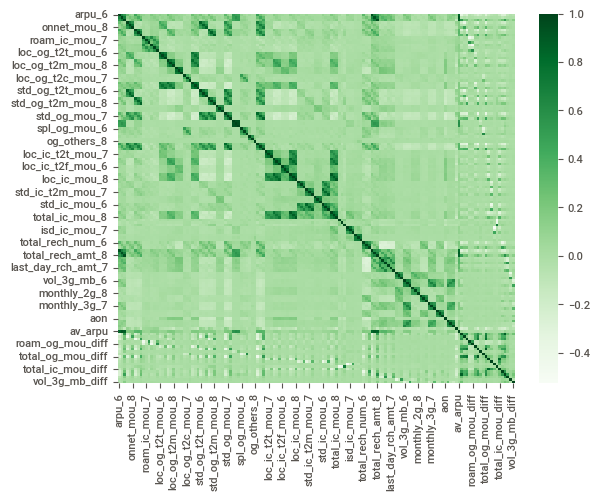

In [1242]:
sns.heatmap(df.corr(numeric_only=True), cmap='Greens')

In [1243]:
corr_matrix = df.corr(numeric_only=True).abs()

## Getting the upper half of matrix
corr_matrix_upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype('bool'))

# Identify columns with high correlation > 95
high_corr_columns = [col for col in corr_matrix_upper.columns if any(corr_matrix_upper[col] > 0.95)]

print(high_corr_columns)

['isd_og_mou_8', 'total_rech_amt_8']


In [1244]:
## Droping High correlation attributes
df.drop(high_corr_columns, axis=1, inplace=True)
df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,av_arpu,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,439.919,397.946,392.024,244.46,108.31,42.98,571.98,727.91,644.43,0.0,0.0,0.0,0.0,0.0,0.0,0.00,7.86,3.98,44.01,13.93,51.24,0.00,0.00,0.00,0.0,0.0,0.00,44.01,21.79,55.23,244.46,100.44,38.99,527.96,713.98,593.18,0.0,0.0,0.00,772.43,814.43,632.18,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,816.44,836.23,687.41,0.00,0.53,1.06,26.93,25.68,23.46,0.00,0.00,0.00,26.93,26.21,24.53,0.23,0.00,0.00,7.33,8.64,2.46,0.00,0.48,0.0,7.56,9.13,2.46,34.49,35.34,26.99,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,15,10,20,521,418,110,110,50,110,0,0,0.00,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,322,0.0,0.00,0.00,0,409.963000,-26.9085,-133.405,-5.515,0.0,0.0,22.330,-161.250,0.0,0.000,-138.925,-2.040,-5.885,0.000,0.000,-7.925,7.5,-104.5,-60.0,0.00,0.00
1,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.0,0.0,0.0,0.0,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.0,0.00,327.46,366.79,385.26,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,6.26,0.00,0.00,6.26,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.03,0.0,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,5,3,4,654,400,250,250,250,0,150,250,260.42,0.00,354.35,0.0,0.00,0.00,1,0,1,0,0,0,0,0,0,0,0,0,602,0.0,0.00,0.00,0,432.043000,-140.6355,176.720,-132.360,0.0,0.0,38.135,6.260,0.0,-0.040,44.315,125.170,-0.515,0.000,0.000,124.655,0.0,125.0,0.0,224.14,0.00
2,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91,0.0,0.0,0.0,0.0,0.0,0.0,859.53,372.71,0.89,79.79,424.63,378.01,11.58,25.43,8.88,0.0,0.0,0.00,950.91,822.78,387.79,0.00,0.00,0.00,202.08,0.00,0.00,0.0,0.0,0.00,202.08,0.00,0.00,0.0,0.0,0.00,0.05,0.01,0.0,0.0,0.0,1152.99,822.83,387.81,233.28,117.63,30.39,123.78,278.49,148.83,34.31,52.08,23.66,391.38,448.21,202.89,0.00,0.00,0.00,207.03,0.00,0.00,0.00,0.00

### Dropping the high corelation variables from the kaggle test data set

In [1245]:
df_test.drop(high_corr_columns, axis=1, inplace=True)

In [1246]:
df_test.shape

(30000, 143)

## Handling Outliers

- Will first check the number of rows detected for the outliers 

In [1247]:
df_outliers = df.copy()
print('Before Outlier removals - ', df_outliers.shape)
rows_before_outlier_removals = df_outliers.shape[0]

for column_name in df_outliers:
    print(f'-------- OUTLIERS for Column :: {column_name} ---------')
    initial_row_count = df_outliers.shape[0]
    # 1st Quartile
    Q1 = np.percentile(df_outliers[column_name],5)

    # 3rd quartile
    Q3 = np.percentile(df_outliers[column_name],99)

    # Inter Quartile Range IQR
    IQR = Q3 - Q1

    # Outlier step
    size = IQR * 1.5

    ## Lower fence
    lower_fence = Q1-size

    ## Upper fence
    upper_fence = Q1 + size

    df_outliers = df_outliers[(df_outliers[column_name] >= lower_fence) & (df_outliers[column_name] <= upper_fence)]
    rows_after_outlier_removals = df_outliers.shape[0]
    print('Rows removed - ', initial_row_count - rows_after_outlier_removals)
        
        
    
    
print('----------------------------------------------------------')    

print('Original data - ', df_outliers.shape)
print('After All Outlier removals - ', df_outliers.shape)
rows_after_outlier_removals = df_outliers.shape[0]

rows_removed = rows_before_outlier_removals - rows_after_outlier_removals
print('Total Rows removed - ', rows_removed)

print('% of Rows as outliers = ', round((rows_removed/rows_before_outlier_removals)*100,2))



Before Outlier removals -  (17500, 144)
-------- OUTLIERS for Column :: arpu_6 ---------
Rows removed -  42
-------- OUTLIERS for Column :: arpu_7 ---------
Rows removed -  34
-------- OUTLIERS for Column :: arpu_8 ---------
Rows removed -  32
-------- OUTLIERS for Column :: onnet_mou_6 ---------
Rows removed -  40
-------- OUTLIERS for Column :: onnet_mou_7 ---------
Rows removed -  41
-------- OUTLIERS for Column :: onnet_mou_8 ---------
Rows removed -  29
-------- OUTLIERS for Column :: offnet_mou_6 ---------
Rows removed -  32
-------- OUTLIERS for Column :: offnet_mou_7 ---------
Rows removed -  25
-------- OUTLIERS for Column :: offnet_mou_8 ---------
Rows removed -  31
-------- OUTLIERS for Column :: roam_ic_mou_6 ---------
Rows removed -  68
-------- OUTLIERS for Column :: roam_ic_mou_7 ---------
Rows removed -  83
-------- OUTLIERS for Column :: roam_ic_mou_8 ---------
Rows removed -  69
-------- OUTLIERS for Column :: roam_og_mou_6 ---------
Rows removed -  69
-------- OUTLIE

Rows removed -  1
-------- OUTLIERS for Column :: total_rech_num_diff ---------
Rows removed -  18
-------- OUTLIERS for Column :: total_rech_amt_diff ---------
Rows removed -  5
-------- OUTLIERS for Column :: max_rech_amt_diff ---------
Rows removed -  48
-------- OUTLIERS for Column :: vol_2g_mb_diff ---------
Rows removed -  42
-------- OUTLIERS for Column :: vol_3g_mb_diff ---------
Rows removed -  22
----------------------------------------------------------
Original data -  (11829, 144)
After All Outlier removals -  (11829, 144)
Total Rows removed -  5671
% of Rows as outliers =  32.41


### insights
- Nearly 33% rows are detected as outliers
- Removing these rows may impact the data set
- Will keep this data and not remove those

## Splitting X and y

In [1248]:
X = df.drop('churn_probability', axis=1)

In [1249]:
y = df['churn_probability']

### Splitting the df into train and validation set

In [1250]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, test_size=0.2, random_state=42, stratify=y)

In [1251]:
# print shapes of train and test sets
print('X_train - ', X_train.shape)
print('y_train - ',y_train.shape)
print('X_test - ',X_test.shape)
print('y_test', y_test.shape)

X_train -  (14000, 143)
y_train -  (14000,)
X_test -  (3500, 143)
y_test (3500,)


### insights
- Training and test set has been divided by 80:20 ratio
- these data are only for High Value customers

## Analyzing Data Imbalance

In [1252]:
### Checking the Churn Rate - TRAIN
churn_percent = (sum(df['churn_probability'])/len(df['churn_probability'].index))*100
churn_percent

6.502857142857142

### insights
- The data is highly imbalanced
- the % of churn customers is only 6.5%
- We shall handle this imbalance while building model

## Rescaling

In [1253]:
scaler = StandardScaler()
scale = scaler.fit_transform(X_train)
X_train = pd.DataFrame(scale, columns=X_train.columns)
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,av_arpu,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,0.050716,0.359041,0.038643,0.561671,1.015204,-0.015498,-0.137070,-0.325745,-0.616943,-0.086965,-0.183217,0.791639,-0.109694,-0.228713,0.564501,-0.284036,0.053800,-0.267658,0.115845,-0.182310,-0.616989,-0.339258,-0.295079,-0.204447,-0.216550,-0.192161,0.729616,-0.122009,-0.094792,-0.577073,0.808973,1.125095,0.003568,-0.160450,-0.193591,-0.369571,-0.154065,-0.147374,-0.160712,0.427953,0.625186,-0.259481,-0.046414,-0.047787,-0.343911,-0.317288,0.000884,-0.181606,-0.020395,-0.023191,0.309646,0.526705,-0.553447,-0.093831,0.054158,0.036081,0.115044,0.275484,-0.478659,-0.051271,0.157716,0.080385,0.024845,0.236466,-0.298376,0.070968,0.010468,0.078420,0.128887,-0.224939,-0.186920,-0.159138,-0.162115,-0.161909,0.112320,-0.172438,-0.113218,0.029888,0.100964,-0.336796,-0.437143,-0.145653,-0.261663,-0.171282,-0.120303,-0.163032,-0.069684,-0.088205,-0.091052,-0.550823,-0.259010,-0.261713,-0.084555,-0.075233,1.555843,1.558032,2.497146,-0.727414,-0.739793,0.253478,1.489451,1.373169,-0.264620,-0.318857,-0.328862,-0.341337,-0.333315,-0.346902,-0.334359,1.548932,0.742216,-0.330968,-0.318530,1.220523,-0.329421,0.883123,-0.159543,-0.154167,1.160175,-0.348363,-0.339774,-0.318704,0.170402,-0.226820,-1.136347,-0.483376,1.031364,0.826225,-0.762296,-1.019673,-0.003773,0.344358,-1.168789,-0.759503,-0.097923,-0.054303,0.076740,-0.667348,0.174918,1.032825,1.113638,-2.076022,-0.033896
1,0.047414,0.246719,0.558559,0.040560,0.931124,2.269287,0.087480,-0.314182,-0.063792,-0.225878,-0.183217,-0.163864,-0.250824,-0.228713,-0.171999,0.388965,-0.081285,0.034941,0.372953,-0.091804,0.142921,-0.179972,-0.198581,-0.324638,-0.216550,-0.192161,-0.235303,0.476889,-0.123937,0.095562,-0.153144,1.108856,2.553228,-0.046705,-0.232875,-0.095186,-0.154065,-0.147374,-0.160712,-0.137960,0.586981,1.622733,-0.046414,-0.047787,-0.343911,-0.317288,0.100916,-0.181606,-0.020395,-0.023191,0.133652,0.474436,1.569673,0.471585,0.199103,0.417

In [1254]:
# Transforming the X_test

scale_data = scaler.transform(X_test)
X_test = pd.DataFrame(scale_data, columns=X_test.columns)
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,av_arpu,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,0.392692,0.118440,-0.983254,0.792186,0.201789,-0.597187,1.097828,0.589637,-0.739414,-0.225878,0.024885,-0.020304,-0.250824,0.392790,0.435687,-0.280694,-0.181377,-0.386094,-0.590398,-0.566299,-0.780175,-0.296812,-0.335686,-0.349157,-0.216550,-0.192161,-0.235303,-0.575592,-0.496365,-0.766230,1.089425,0.306705,-0.467634,1.671233,0.910393,-0.475167,-0.154065,-0.147374,-0.160712,1.873544,0.835059,-0.645780,-0.046414,-0.047787,-0.343911,-0.317288,-0.317796,-0.181606,-0.020395,-0.023191,1.378451,0.506006,-1.026599,-0.354205,-0.274088,-0.436423,-0.177758,-0.379439,-0.777993,-0.352934,-0.329773,-0.350393,-0.356473,-0.459196,-0.816650,0.497759,0.360323,-0.219182,-0.154614,-0.095973,-0.322789,-0.159138,-0.162115,-0.161909,0.127392,0.114395,-0.372953,-0.293644,-0.378897,-0.878905,-0.437143,-0.145653,-0.261663,-0.171282,-0.1754,-0.163032,-0.047699,-0.088205,-0.091052,0.278874,-0.460759,-0.361112,0.451232,-0.149792,-0.290427,-0.289586,-0.752466,-0.247264,-0.535582,-0.749466,-0.281296,-0.282050,-0.264620,-0.318857,-0.328862,-0.341337,-0.333315,-0.346902,-0.334359,-0.291539,-0.304528,-0.330968,-0.318530,-0.312247,-0.329421,-0.161552,-0.159543,-0.154167,-0.940787,-0.348363,-0.339774,-0.318704,-0.194152,-1.715544,-1.526967,-1.936187,0.098489,0.457975,-0.342257,-2.567832,-0.003773,-0.053534,-2.358148,-0.699126,-0.689844,-0.018004,0.076740,-0.887414,-0.360643,-1.443861,-0.569251,0.008160,-0.033896
1,0.385710,-0.179937,-0.362058,-0.646319,-0.641240,-0.601384,-0.854417,-0.887196,-0.803738,-0.225878,-0.183217,-0.196138,-0.226293,-0.228713,-0.206145,-0.392940,-0.368105,-0.331459,-0.672985,-0.771392,-0.687505,-0.339258,-0.335686,-0.349157,-0.216550,-0.192161,0.046032,-0.702080,-0.750941,-0.671625,-0.469057,-0.484792,-0.467634,-0.493776,-0.495887,-0.467885,-0.154065,-0.147374,-0.160712,-0.656460,-0.675018,-0.640679,-0.046414,-0.047787,-0.343911,-0.317288,-0.224880,-0.181606,-0.020395,-0.023191,-1.021685,-

In [1255]:
df_test.shape

(30000, 143)

In [1256]:
X_test.shape

(3500, 143)

In [1257]:
# Transforming kaggle test data

df_test_scale = scaler.transform(df_test)
df_test = pd.DataFrame(df_test_scale, columns=df_test.columns)
df_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,av_arpu,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,-1.066769,-1.098255,-1.060621,-0.581387,-0.613368,-0.583130,-0.770930,-0.845381,-0.790942,-0.225878,-0.183217,-0.196138,-0.250824,-0.228713,-0.206145,-0.295359,-0.313981,-0.303256,-0.660245,-0.743000,-0.745559,-0.339258,0.257269,-0.349157,-0.21655,-0.192161,-0.231711,-0.632441,-0.662004,-0.689488,-0.453107,-0.484792,-0.463061,-0.399702,-0.493938,-0.419383,-0.154065,-0.147374,-0.160712,-0.581180,-0.673669,-0.603669,-0.046414,-0.047787,-0.343911,-0.317288,-0.316609,-0.181606,-0.020395,-0.023191,-0.912364,-1.018129,-0.946412,-0.250206,-0.194791,-0.301562,-0.700948,-0.771628,-0.733182,-0.353386,-0.329773,-0.350393,-0.668586,-0.668956,-0.714748,-0.223687,-0.200794,-0.219182,-0.320131,-0.308257,-0.281350,-0.159138,-0.162115,-0.161909,-0.375862,-0.349564,-0.342553,-0.754680,-0.750813,-0.779296,3.160309,2.832354,3.103977,-0.171282,-0.175400,-0.163032,-0.069684,-0.088205,-0.091052,-0.758247,-0.763383,-0.758711,-1.023814,-1.050838,-0.671663,-0.836615,-0.866688,-0.521635,-0.535582,-0.749466,-0.281296,-0.28205,-0.26462,-0.318857,-0.328862,-0.341337,-0.333315,-0.346902,-0.334359,-0.291539,-0.304528,-0.330968,-0.31853,-0.312247,-0.329421,-0.161552,-0.159543,-0.154167,0.423301,-0.348363,-0.339774,-0.318704,-1.215352,-0.032121,0.016484,-0.000920,0.022865,0.029795,-0.027565,0.017630,-0.003773,-0.052053,0.003130,-0.055391,0.043475,-0.018004,-0.278444,-0.028475,-0.025917,-0.050005,-0.108973,0.00816,-0.033896
1,-0.419150,-0.243674,-0.506139,-0.491871,-0.572760,-0.589604,0.053942,0.302555,-0.098042,-0.225878,-0.183217,-0.196138,-0.250824,-0.228713,-0.206145,-0.096305,-0.235125,-0.308055,1.077251,1.645503,0.781962,-0.305940,-0.335686,-0.349157,-0.21655,-0.192161,-0.235303,0.621437,0.850139,0.269282,-0.469057,-0.484792,-0.467634,-0.494407,-0.459867,-0.437851,-0.154065,-0.147374,-0.160712,-0.656894,-0.650077,-0.619638,-0.046414,-0.047787,-0.343911,-0.317288,-0.317796,-0.181606,-0.020395,-0.023191,-0.260

In [1258]:
df_test.shape

(30000, 143)

# Objective 1 - Predictions

## Model with PCA

In [1259]:
# intantiate PCA
pca = PCA(random_state=42)

In [1260]:
# Fit the train in pca
pca.fit(X_train)

PCA(random_state=42)

In [1261]:
pca.components_

array([[ 8.15260969e-02,  6.89708834e-02,  6.76988864e-02, ...,
        -1.48117082e-03, -2.79543384e-03,  5.28690689e-03],
       [ 1.71521445e-01,  1.81896521e-01,  1.51111381e-01, ...,
        -5.84767250e-03, -1.19413655e-03, -2.59070465e-03],
       [-9.66619952e-02,  1.81284130e-03,  1.62832021e-01, ...,
         1.00900276e-01,  2.38387081e-02,  5.21737349e-02],
       ...,
       [ 0.00000000e+00, -3.51551687e-16, -3.54023799e-02, ...,
         1.38455770e-01, -1.53085578e-02, -5.21808264e-02],
       [ 0.00000000e+00,  8.26430983e-16,  4.37168519e-02, ...,
        -1.90775739e-01, -1.64349259e-03, -8.02222076e-03],
       [ 0.00000000e+00, -4.29373278e-16, -3.69091263e-02, ...,
         6.70920024e-02,  1.60479165e-02, -1.06329512e-02]])

In [1262]:
cumm_variance = np.cumsum(pca.explained_variance_ratio_)
cumm_variance

array([0.08535584, 0.15775493, 0.21369625, 0.26492199, 0.30706512,
       0.34172145, 0.37440443, 0.40063322, 0.42531732, 0.4482556 ,
       0.46961992, 0.49053181, 0.51076364, 0.53035066, 0.54949014,
       0.56755615, 0.58482947, 0.60133401, 0.61608903, 0.63050925,
       0.64465817, 0.65770691, 0.67056598, 0.68317606, 0.6951896 ,
       0.70706744, 0.71876905, 0.73031453, 0.74149864, 0.75250564,
       0.76327891, 0.77389298, 0.78380767, 0.79323567, 0.80182169,
       0.8103857 , 0.81867203, 0.82657928, 0.83426695, 0.84159943,
       0.84850683, 0.85513737, 0.86146707, 0.86734486, 0.87313395,
       0.87868984, 0.88419356, 0.88962322, 0.89479732, 0.89960891,
       0.90419331, 0.90844554, 0.91218378, 0.91588138, 0.9194005 ,
       0.9228684 , 0.92615937, 0.92930721, 0.93241747, 0.93549231,
       0.93836413, 0.94122003, 0.94401757, 0.94674812, 0.94941705,
       0.95190579, 0.95433945, 0.95669926, 0.9590251 , 0.96121914,
       0.96335416, 0.96543146, 0.9674423 , 0.96937462, 0.97127

Text(0, 0.5, 'Cumulative Variance')

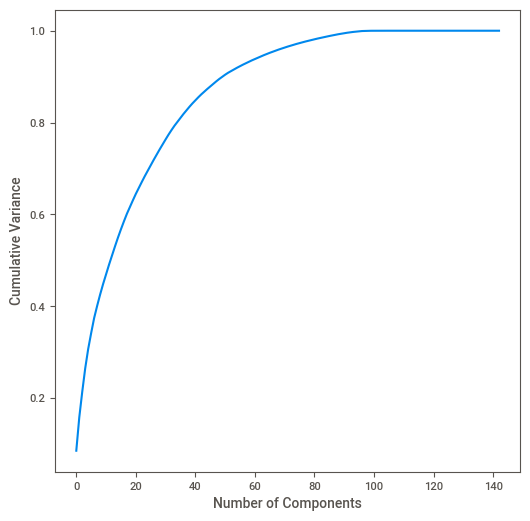

In [1263]:
# Plotting scree plot
fig = plt.figure(figsize = (6,6))
plt.plot(cumm_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

## Insight
- As per the above graph the optimal number of components can be 60
- We shall build the PCA model with 60 components
- All we shall be building different models to analyse the meyyrics using these PCA 60 components

## Modeling PCA with 60 components

In [1264]:
# instantiate IncrementalPCA with 60 components
pca_incremental = IncrementalPCA(n_components=60)

In [1265]:
# fit and transform
X_train_pca = pca_incremental.fit_transform(X_train)

In [1266]:
## transforming the X_test
X_test_pca = pca_incremental.transform(X_test)

### Fitting for Kaggle test

In [1267]:
df_test_pca =  pca_incremental.transform(df_test)

### Function to get the classification metrics

In [1268]:
sensitivity_list = []
specificity_list = []
accuracy_list = []

def classification_metrics(y_train, y_train_pred):
    # Confusion matrix
    confusion = metrics.confusion_matrix(y_train, y_train_pred)
    print(confusion)
    
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    
    # Accuracy
    accuracy = metrics.accuracy_score(y_train, y_train_pred)
    print("Accuracy:-",accuracy)
    accuracy_list.append(accuracy)

    # Sensitivity
    sensitivity = TP / float(TP+FN)
    print("Sensitivity:-",sensitivity)
    sensitivity_list.append(sensitivity)

    # Specificity
    specificity = TN / float(TN+FP)
    print("Specificity:-", specificity)
    specificity_list.append(specificity)
    
    metric_object = {
        'accuracy': accuracy,
        'sensitivity': sensitivity,
        'specificity': specificity
    }
    return metric_object

In [1269]:
## Class imbalance
y_train.value_counts()/y_train.shape

0    0.935
1    0.065
Name: churn_probability, dtype: float64

## Model 1 - Logistic Regression with PCA 60 components

In [1270]:
logreg = LogisticRegression(random_state=42, class_weight='balanced')
logreg_mod = logreg.fit(X_train_pca, y_train)

In [1271]:
y_train_pred = logreg_mod.predict(X_train_pca)

In [1272]:
# y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [1273]:
y_train_pred_final = pd.DataFrame({'Actual Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

,Actual Churn,Churn_Prob
0,0,1
1,1,0
2,0,0
3,0,0
4,0,0


### Tuning Hyperparameter for C in logistic regression

In [1274]:
logreg = LogisticRegression(random_state=42, class_weight='balanced')

In [1275]:
# Creating K fold 
folds = KFold(n_splits=5, shuffle=True, random_state=42)

In [1276]:
## Specify C params in a dictionary
params = {'C': [0.01, 0.1, 1, 10.0, 100.0, 1000.0]}

In [1277]:
# Creating different models using GridSearchCV
gridSearch_cv_model = GridSearchCV(estimator=LogisticRegression(),
                                  param_grid=params,
                                  scoring='recall',
                                  cv=folds,
                                  verbose=1,
                                  return_train_score=True)

In [1278]:
# fitting the gridSearch_cv_model
gridSearch_cv_model.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10.0, 100.0, 1000.0]},
             return_train_score=True, scoring='recall', verbose=1)

In [1279]:
# results of grid search CV
cv_results = pd.DataFrame(gridSearch_cv_model.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.057930,0.005836,0.002470,0.000729,0.01,{'C': 0.01},0.192547,0.137566,0.214286,0.123711,0.184783,0.170578,0.034296,6,0.182911,0.184466,0.149725,0.187151,0.177686,0.176388,0.013684
1,0.101077,0.006677,0.002453,0.000596,0.1,{'C': 0.1},0.192547,0.169312,0.225275,0.159794,0.211957,0.191777,0.024729,5,0.220294,0.209431,0.186813,0.224860,0.206612,0.209602,0.013232
2,0.114898,0.016496,0.001994,0.000521,1,{'C': 1},0.198758,0.201058,0.230769,0.175258,0.228261,0.206821,0.020628,4,0.229640,0.213592,0.192308,0.226257,0.209366,0.214233,0.013317
3,0.115729,0.020676,0.002380,0.000379,10.0,{'C': 10.0},0.198758,0.201058,0.230769,0.175258,0.233696,0.207908,0.021837,1,0.229640,0.213592,0.196429,0.226257,0.209366,0.215057,0.011997
4,0.108567,0.016559,0.002364,0.000421,100.0,{'C': 100.0},0.198758,0.201058,0.230769,0.175258,0.233696,0.207908,0.021837,1,0.229640,0.213592,0.196429,0.227654,0.209366,0.215336,0.012268
5,0.112678,0.017302,0.001736,0.000620,1000.0,{'C': 1000.0},0.198758,0.201058,0.230769,0.175258,0.233696,0.207908,0.021837,1,0.229640,0.213592,0.196429,0.227654,0.209366,0.215336,0.012268


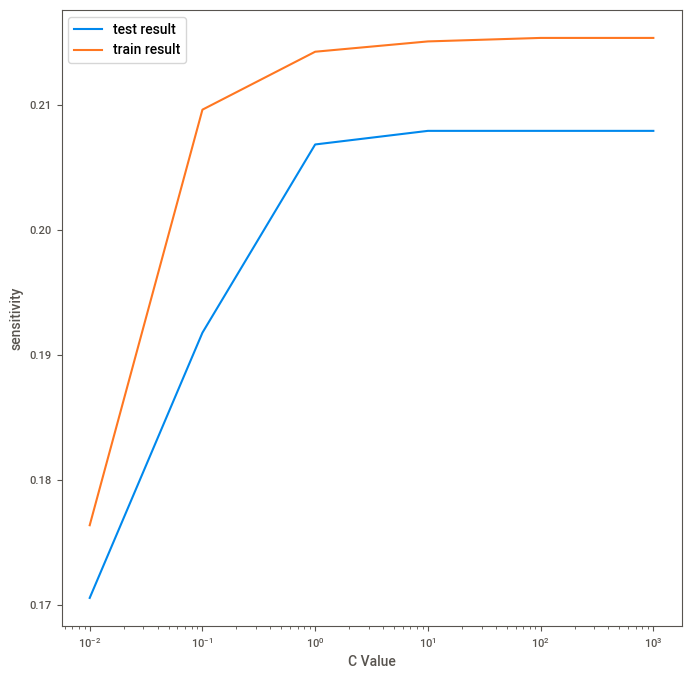

In [1280]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 8))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C Value')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [1281]:
# Getting the best score
best_score = gridSearch_cv_model.best_score_
best_score

0.2079077159870526

In [1282]:
best_params = gridSearch_cv_model.best_params_
best_params

{'C': 10.0}

In [1283]:
best_c = best_params['C']
best_c

10.0

### Logistic regression with best C

In [1284]:
# Initiate the logistic Regression model with the best C value obtained above
logreg_pca = LogisticRegression(C=best_c, random_state=42, class_weight='balanced')

In [1285]:
# fit the model
logreg_pca.fit(X_train_pca, y_train)

LogisticRegression(C=10.0, class_weight='balanced', random_state=42)

----------- THRESHOLD ::: 0.2 ----------
[[6221 6869]
 [  49  861]]
Accuracy:- 0.5058571428571429
Sensitivity:- 0.9461538461538461
Specificity:- 0.47524828113063405
----------- THRESHOLD ::: 0.3 ----------
[[7914 5176]
 [  74  836]]
Accuracy:- 0.625
Sensitivity:- 0.9186813186813186
Specificity:- 0.6045836516424752
----------- THRESHOLD ::: 0.4 ----------
[[9304 3786]
 [ 109  801]]
Accuracy:- 0.7217857142857143
Sensitivity:- 0.8802197802197802
Specificity:- 0.7107715813598167
----------- THRESHOLD ::: 0.5 ----------
[[10473  2617]
 [  155   755]]
Accuracy:- 0.802
Sensitivity:- 0.8296703296703297
Specificity:- 0.8000763941940413
----------- THRESHOLD ::: 0.56 ----------
[[11081  2009]
 [  200   710]]
Accuracy:- 0.8422142857142857
Sensitivity:- 0.7802197802197802
Specificity:- 0.846524064171123
----------- THRESHOLD ::: 0.57 ----------
[[11177  1913]
 [  211   699]]
Accuracy:- 0.8482857142857143
Sensitivity:- 0.7681318681318682
Specificity:- 0.8538579067990832
----------- THRESHOLD ::: 0.

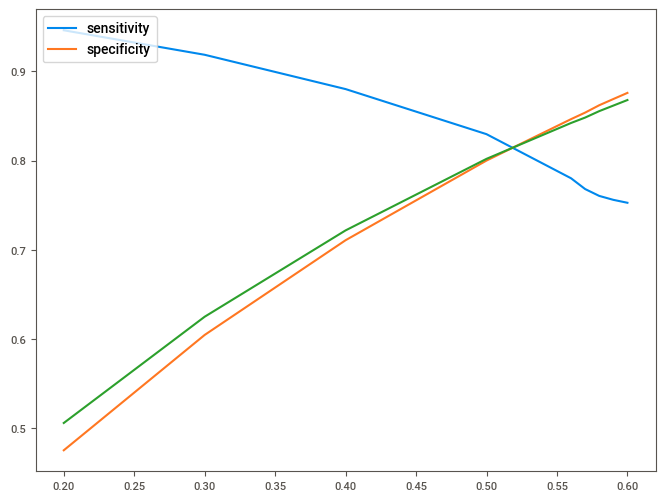

In [1286]:
# train set prediction

threshold = [0.2,0.3,0.4,0.5,0.56,0.57,0.58,0.59,0.6]
sensitivity_list = []
specificity_list = []
accuracy_list = []



for thresh in threshold:
    print(f'----------- THRESHOLD ::: {thresh} ----------')
    y_train_pred = np.where((logreg_pca.predict_proba(X_train_pca)[:, 1])>= thresh, 1,0)
    ## Calling the metrics calculation function
    classification_metrics(y_train, y_train_pred)


    
plt.figure(figsize=(8,6))
plt.plot(threshold, sensitivity_list)
plt.plot(threshold, specificity_list)
plt.plot(threshold, accuracy_list)
plt.legend(['sensitivity', 'specificity'], loc='upper left')
plt.show()

In [1287]:
churn_prob_pred = logreg_pca.predict_proba(X_train_pca)[:,1]
churn_prob_pred

array([0.68649304, 0.00385221, 0.08128537, ..., 0.26819412, 0.06452936,
       0.14431638])

In [1288]:
fpr, tpr, thresholds = metrics.roc_curve( y_train, churn_prob_pred, drop_intermediate = False )
fpr, tpr, thresholds

(array([0.00000000e+00, 7.63941940e-05, 7.63941940e-05, ...,
        9.99847212e-01, 9.99923606e-01, 1.00000000e+00]),
 array([0.       , 0.       , 0.0010989, ..., 1.       , 1.       ,
        1.       ]),
 array([1.99999712e+00, 9.99997123e-01, 9.99933715e-01, ...,
        4.13079048e-09, 1.46375427e-10, 2.55550517e-12]))

In [1289]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

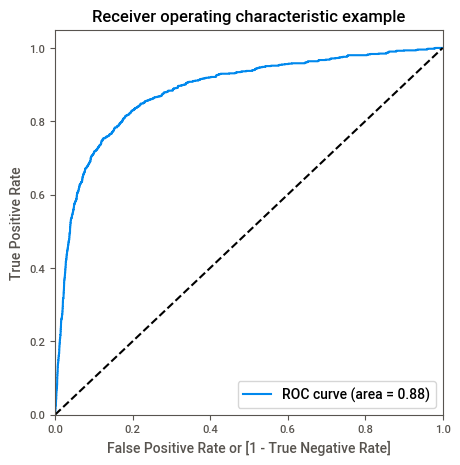

In [1290]:
draw_roc(y_train, churn_prob_pred)

### Prediction using Threshold= 0.3

In [1291]:
# Train set

print(f'----------- THRESHOLD ::: 0.3 ----------')
y_train_pred = np.where((logreg_pca.predict_proba(X_train_pca)[:, 1])>= 0.3, 1,0)
metric_obj_tr_3 = classification_metrics(y_train, y_train_pred)



# Test set
print(f'----------- PREDICTION :: X_test_PCA :: THRESHOLD ::: 0.3 ----------')
y_test_pred = np.where((logreg_pca.predict_proba(X_test_pca)[:, 1])>= 0.3, 1,0)
metric_obj_ts_3 = classification_metrics(y_test, y_test_pred)


----------- THRESHOLD ::: 0.3 ----------
[[7914 5176]
 [  74  836]]
Accuracy:- 0.625
Sensitivity:- 0.9186813186813186
Specificity:- 0.6045836516424752
----------- PREDICTION :: X_test_PCA :: THRESHOLD ::: 0.3 ----------
[[2019 1253]
 [  27  201]]
Accuracy:- 0.6342857142857142
Sensitivity:- 0.881578947368421
Specificity:- 0.6170537897310513


### Prediction using Threshold = 0.4

In [1292]:
# Train set

print(f'----------- THRESHOLD ::: 0.4 ----------')
y_train_pred = np.where((logreg_pca.predict_proba(X_train_pca)[:, 1])>= 0.4, 1,0)
metric_obj_tr_4 = classification_metrics(y_train, y_train_pred)




# test set

print(f'----------- PREDICTION :: X_test_PCA :: THRESHOLD ::: 0.4 ----------')
y_test_pred = np.where((logreg_pca.predict_proba(X_test_pca)[:, 1])>= 0.4, 1,0)
metric_obj_ts_4 = classification_metrics(y_test, y_test_pred)



----------- THRESHOLD ::: 0.4 ----------
[[9304 3786]
 [ 109  801]]
Accuracy:- 0.7217857142857143
Sensitivity:- 0.8802197802197802
Specificity:- 0.7107715813598167
----------- PREDICTION :: X_test_PCA :: THRESHOLD ::: 0.4 ----------
[[2365  907]
 [  38  190]]
Accuracy:- 0.73
Sensitivity:- 0.8333333333333334
Specificity:- 0.722799511002445


### Prediction using Threshold = 0.5

In [1293]:
# Train set

print(f'----------- THRESHOLD ::: 0.5 ----------')
y_train_pred = np.where((logreg_pca.predict_proba(X_train_pca)[:, 1])>= 0.5, 1,0)
metric_obj_tr_5 = classification_metrics(y_train, y_train_pred)



# test set

print(f'----------- PREDICTION :: X_test_PCA :: THRESHOLD ::: 0.5 ----------')
y_test_pred = np.where((logreg_pca.predict_proba(X_test_pca)[:, 1])>= 0.5, 1,0)
metric_obj_ts_5 = classification_metrics(y_test, y_test_pred)



----------- THRESHOLD ::: 0.5 ----------
[[10473  2617]
 [  155   755]]
Accuracy:- 0.802
Sensitivity:- 0.8296703296703297
Specificity:- 0.8000763941940413
----------- PREDICTION :: X_test_PCA :: THRESHOLD ::: 0.5 ----------
[[2676  596]
 [  50  178]]
Accuracy:- 0.8154285714285714
Sensitivity:- 0.7807017543859649
Specificity:- 0.8178484107579462


In [1294]:
analysis_object = {
    'threshold':['0.3','0.4', '0.5'],
    'train_accuracy':[metric_obj_tr_3['accuracy'], metric_obj_tr_4['accuracy'], metric_obj_tr_5['accuracy']],
    'test_accuracy':[metric_obj_ts_3['accuracy'], metric_obj_ts_4['accuracy'], metric_obj_ts_5['accuracy']],
    'train_sensitivity': [metric_obj_tr_3['sensitivity'], metric_obj_tr_4['sensitivity'], metric_obj_tr_5['sensitivity']],
    'test_sensitivity': [metric_obj_ts_3['sensitivity'], metric_obj_ts_4['sensitivity'], metric_obj_ts_5['sensitivity']],
    'train_specificity': [metric_obj_tr_3['specificity'], metric_obj_tr_4['specificity'], metric_obj_tr_5['specificity']],
    'test_specificity': [metric_obj_ts_3['specificity'], metric_obj_ts_4['specificity'], metric_obj_ts_5['specificity']]
}

In [1295]:
analysis_df = pd.DataFrame(analysis_object)
analysis_df

,threshold,train_accuracy,test_accuracy,train_sensitivity,test_sensitivity,train_specificity,test_specificity
0,0.3,0.625000,0.634286,0.918681,0.881579,0.604584,0.617054
1,0.4,0.721786,0.730000,0.880220,0.833333,0.710772,0.722800
2,0.5,0.802000,0.815429,0.829670,0.780702,0.800076,0.817848


### Choosing the threshold as 0.4

In [1296]:
y_test_pred = np.where((logreg_pca.predict_proba(X_test_pca)[:, 1])>= 0.4, 1,0)

In [1297]:
y_test_pred

array([1, 0, 0, ..., 0, 0, 0])

In [1298]:
df_test.shape

(30000, 143)

### Kaggle Test

In [1299]:
kaggle_pred = np.where((logreg_pca.predict_proba(df_test_pca)[:, 1])>= 0.4, 1,0)

In [1300]:
len(kaggle_pred)

30000

In [1301]:
kaggle_pred

array([0, 0, 1, ..., 1, 1, 0])

In [1302]:
# submission_df = pd.DataFrame({'id':id, 'churn_probability': kaggle_pred})

# # saving the dataframe
# submission_df.to_csv('submission.csv',index=False)

## Model 2 - Decision tree with PCA 60 components

In [1303]:
# instantiate tree
dtree = DecisionTreeClassifier(random_state=42, class_weight='balanced')

 <b>Hyperparameter Tuning for Decision Tree</b>

In [1304]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [50, 100],
    'min_samples_split': [50, 100]
}

In [1305]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dtree,
                           param_grid=params, 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=1, 
                           scoring = "recall")

In [1306]:
# fit the model
grid_search.fit(X_train_pca, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [50, 100],
                         'min_samples_split': [50, 100]},
             scoring='recall', verbose=1)

In [1307]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.028760,0.012595,0.006166,0.000515,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.692308,0.741758,0.763736,0.697802,0.681319,0.715385,0.031735,9
1,1.038533,0.027081,0.006047,0.001019,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.692308,0.741758,0.763736,0.697802,0.681319,0.715385,0.031735,9
2,1.003454,0.016126,0.006541,0.003122,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.708791,0.747253,0.774725,0.708791,0.714286,0.730769,0.026236,7
3,0.969270,0.026643,0.003717,0.000674,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.708791,0.747253,0.774725,0.708791,0.714286,0.730769,0.026236,7
4,1.538764,0.074036,0.003801,0.000400,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.686813,0.708791,0.725275,0.653846,0.692308,0.693407,0.023925,11


In [1308]:
# best scores
print("Best sensitivity score :-", grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

Best sensitivity score :- 0.7516483516483516
DecisionTreeClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=100, min_samples_split=50,
                       random_state=42)
{'max_depth': 15, 'min_samples_leaf': 100, 'min_samples_split': 50}


 <b>Creating Model with optimal value of parameters</b>

In [1309]:
# Model with optimal hyperparameters
dtree_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 42,
                                  max_depth=15, 
                                  min_samples_leaf=100,
                                  min_samples_split=50,
                                        class_weight='balanced')

dtree_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=100, min_samples_split=50,
                       random_state=42)

In [1310]:
# Predictions on the train set
y_train_pred = dtree_pca_model.predict(X_train_pca)

In [1311]:
# metric scores
classification_metrics(y_train, y_train_pred)

[[10677  2413]
 [  127   783]]
Accuracy:- 0.8185714285714286
Sensitivity:- 0.8604395604395605
Specificity:- 0.8156608097784568


{'accuracy': 0.8185714285714286,
 'sensitivity': 0.8604395604395605,
 'specificity': 0.8156608097784568}

### Prediction on test set

In [1312]:
# Prediction on the test set
y_test_pred = dtree_pca_model.predict(X_test_pca)

In [1313]:
mod_2_dt_metrics = classification_metrics(y_test, y_test_pred)
mod_2_dt_metrics

[[2654  618]
 [  58  170]]
Accuracy:- 0.8068571428571428
Sensitivity:- 0.7456140350877193
Specificity:- 0.8111246943765281


{'accuracy': 0.8068571428571428,
 'sensitivity': 0.7456140350877193,
 'specificity': 0.8111246943765281}

# Model 3 - Building Random Forest with PCA

### Hypertuning parameters

In [1314]:
params = {
    'max_depth': [5,10,15,20],
    'min_samples_leaf': [50,100,150],
    'n_estimators': [150, 250, 350],
    'max_features': [10,20]
}

In [1315]:
# intantiate random forest
# balancing the weight
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

In [1316]:
folds = 5
## Grid search CV
grid_search = GridSearchCV(estimator=rf,
                          param_grid=params,
                          cv=folds,
                          n_jobs=-1,
                          verbose=1,
                          return_train_score=True)

In [1317]:
# Fit the model
grid_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20], 'max_features': [10, 20],
                         'min_samples_leaf': [50, 100, 150],
                         'n_estimators': [150, 250, 350]},
             return_train_score=True, verbose=1)

In [1318]:
# Grid search best score
print('Random Forest Grid search best score - ', grid_search.best_score_)

Random Forest Grid search best score -  0.8855714285714287


In [1319]:
# Grid search best param
print('Random Forest Grid search best params - ', grid_search.best_params_)

Random Forest Grid search best params -  {'max_depth': 15, 'max_features': 10, 'min_samples_leaf': 50, 'n_estimators': 350}


### Build model with optimal parameters

In [1320]:
rf_pca_model = RandomForestClassifier(bootstrap=True,
                             max_depth=15,
                             min_samples_leaf=50,
                             max_features=10,
                             n_estimators=350,
                                     class_weight='balanced')

In [1321]:
# Fit the model
rf_pca_model.fit(X_train_pca, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15, max_features=10,
                       min_samples_leaf=50, n_estimators=350)

### Prediction on the train set

In [1322]:

y_train_pred = rf_pca_model.predict(X_train_pca)

In [1323]:
classification_metrics(y_train, y_train_pred)

[[11853  1237]
 [  147   763]]
Accuracy:- 0.9011428571428571
Sensitivity:- 0.8384615384615385
Specificity:- 0.9055003819709702


{'accuracy': 0.9011428571428571,
 'sensitivity': 0.8384615384615385,
 'specificity': 0.9055003819709702}

In [1324]:
print("ROC:    \t", round(roc_auc_score(y_train, y_train_pred),2))

ROC:    	 0.87


## Prediction on test set

In [1325]:
y_test_pred = rf_pca_model.predict(X_test_pca)

In [1326]:
model_3_rf_metrics = classification_metrics(y_test, y_test_pred)
model_3_rf_metrics

[[2956  316]
 [  72  156]]
Accuracy:- 0.8891428571428571
Sensitivity:- 0.6842105263157895
Specificity:- 0.9034229828850856


{'accuracy': 0.8891428571428571,
 'sensitivity': 0.6842105263157895,
 'specificity': 0.9034229828850856}

In [1327]:
print("ROC:    \t", round(roc_auc_score(y_test, y_test_pred),2))

ROC:    	 0.79


### Prediction on the Kaggle test set

In [1328]:
kaggle_pred = rf_pca_model.predict(df_test_pca)

In [1329]:
len(kaggle_pred)

30000

In [1330]:
# submission_df = pd.DataFrame({'id':id, 'churn_probability': kaggle_pred})

# # saving the dataframe
# submission_df.to_csv('submission.csv',index=False)

## Model 4 - XgBoost

In [1331]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
xgb_cfl.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [1332]:
# Fit the model to our train and target
xgb_cfl.fit(X_train_pca, y_train)  # default 

# Get our predictions
xgb_predictions = xgb_cfl.predict(X_test_pca)

In [1333]:
xgb_predictions_prob = xgb_cfl.predict_proba(X_test_pca)
xgb_predictions_prob

array([[5.9270179e-01, 4.0729821e-01],
       [9.9396318e-01, 6.0368376e-03],
       [9.9426824e-01, 5.7317708e-03],
       ...,
       [9.8978049e-01, 1.0219486e-02],
       [9.9958873e-01, 4.1129900e-04],
       [9.9951714e-01, 4.8284401e-04]], dtype=float32)

In [1334]:
accuracy_score(y_test, xgb_predictions)

0.9382857142857143

### Hyper Tuning - Random Search

In [1335]:
# A parameter grid for XGBoost
params = {
        'n_estimators' : [100, 200, 500, 750], # no of trees 
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],  # eta
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12]
        }

folds = 5

param_comb = 800

random_search = RandomizedSearchCV(xgb_cfl, 
                                   param_distributions=params, 
                                   n_iter=param_comb, 
                                   scoring='recall', 
                                   n_jobs=-1, 
                                   cv=5, 
                                   verbose=3, 
                                   random_state=42)


In [1337]:
random_search.fit(X_train_pca, y_train)

In [ ]:
random_search.best_estimator_

In [ ]:
print('best parameters - ')
print(random_search.best_params_)

#### Best Hyperparameters received - 
{'subsample': 0.6, 'n_estimators': 100, 'min_child_weight': 7, 'max_depth': 10, 'learning_rate': 0.25, 'gamma': 5, 'colsample_bytree': 1.0}

### Building model with best Hyperparameters

In [ ]:
xgb_cfl_best_param = xgb.XGBClassifier(n_jobs = -1,
                                       objective = 'binary:logistic',
                                      subsample=0.6,
                                      n_estimators=100,
                                      min_child_weight=7,
                                      max_depth=10,
                                      learning_rate=0.25,
                                      gamma=5,
                                      colsample_bytree= 1.0)

In [ ]:
xgb_cfl_best_param.fit(X_train_pca, y_train)

### Prediction on train

In [ ]:
y_train_pred = xgb_cfl_best_param.predict(X_train_pca)

In [ ]:
classification_metrics(y_train, y_train_pred)

### Prediction on test

In [ ]:
y_test_pred = xgb_cfl_best_param.predict(X_test_pca)

In [ ]:
print("ROC:    \t", round(roc_auc_score(y_test, y_test_pred),2))

In [ ]:
mod_4_xgboost_metrics = classification_metrics(y_test, y_test_pred)

mod_4_xgboost_metrics

### Applying model on Kaggle test data set

In [ ]:
kaggle_pred = xgb_cfl_best_param.predict(df_test_pca)

In [ ]:
len(kaggle_pred)

In [ ]:
submission_df = pd.DataFrame({'id':id, 'churn_probability': kaggle_pred})

# saving the dataframe
submission_df.to_csv('submission.csv',index=False)

## Final Insights on Predictions

### Evaluation Criteria

- This is a classification problem, we need to analyse the result with confusion matrix and other metrics associated with it
- As per the problem statement we need to retain the churn customers
- Our focus shall be more on the churn customers than non-churn
- We cannot have the flexibility in misclassification of churn customers , 
however other way round if few non-churn customers are misclassified as churn thats not an issue 
- On the metrics we shall be focusing more on Sensitivity and recall than accuracy

### Final Insights
- We have applied PCA on the data set followed with multiple models - Logistic, Decision tree, Random Forest and XgBoost
- On running the predictions for all the above model , few observations listed below
    - Random Forest seems to have a high sensitivity
    - XgBoost had a high accuracy score
    
For the Kaggle case study as the evaluation criteria is on accuracy we have considered the final prediction of XgBoost

# Objective 2 - Important variables

## Non PCA model

## Applying Regularization

## Lasso

In [1338]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [1339]:
# Applying Lasso
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [1340]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,42.497140,0.752950,0.004216,0.000451,0.0001,{'alpha': 0.0001},NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8.599509,2.694086,0.003687,0.000447,0.001,{'alpha': 0.001},NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.017280,0.314816,0.004029,0.000925,0.01,{'alpha': 0.01},NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.316321,0.095777,0.004134,0.000074,0.05,{'alpha': 0.05},NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.041600,0.000957,0.003734,0.000358,0.1,{'alpha': 0.1},NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1341]:
model_cv.best_estimator_

Lasso(alpha=0.0001)

In [1342]:
model_cv.best_params_

{'alpha': 0.0001}

In [1343]:
X_train.shape

(14000, 143)

In [1344]:
alpha = model_cv.best_params_['alpha']

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [1345]:
len(lasso.coef_)

143

In [1346]:
coef_df = pd.DataFrame({'variables':X_train.columns, 'lasso_coef': lasso.coef_})
coef_df = coef_df.sort_values(by='lasso_coef', key=abs, ascending=False)                     

In [1347]:
## Getting top 10 features of lasso regularization
coef_df.iloc[:10]

,variables,lasso_coef
93,total_rech_amt_7,-0.045367
34,std_og_t2m_mou_7,0.038511
8,offnet_mou_8,-0.034540
122,av_arpu,0.026249
32,std_og_t2t_mou_8,-0.024825
7,offnet_mou_7,-0.024500
138,total_rech_num_diff,-0.022118
137,total_ic_mou_diff,-0.019818
1,arpu_7,0.018743
4,onnet_mou_7,0.018101


## Ridge

In [1348]:
# Applying Ridge
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [1349]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.024801,0.001868,0.003488,0.000674,0.0001,{'alpha': 0.0001},NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.025325,0.001510,0.004012,0.000402,0.001,{'alpha': 0.001},NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.024532,0.002118,0.004125,0.000215,0.01,{'alpha': 0.01},NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.023725,0.000421,0.004095,0.000452,0.05,{'alpha': 0.05},NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.023332,0.000796,0.004119,0.000137,0.1,{'alpha': 0.1},NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1350]:
model_cv.best_estimator_

Ridge(alpha=0.0001)

In [1351]:
model_cv.best_params_

{'alpha': 0.0001}

In [1352]:
alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 1.95487933e-02,  2.28730105e-02,  8.45597056e-03,  2.55892074e-02,
       -6.39561490e-02, -7.28132568e-02,  7.07927635e-02, -1.77129655e-01,
       -1.21390354e-01,  6.14118304e-03,  8.12562562e-04,  3.21339471e-03,
       -1.36143924e-02,  3.97344068e-02,  2.90212155e-02,  6.50971834e+00,
        6.19949276e+00,  2.78689617e+01,  6.67753395e+00,  5.78915075e+00,
        2.64895428e+01,  5.56042556e-01,  5.40903617e-01,  2.28157414e+00,
       -7.05812888e-03, -1.11747160e-04,  1.62291962e-03, -1.21755209e+01,
       -1.18098285e+01, -1.43380620e+01,  3.68975212e+00,  1.39775510e+00,
        1.54521191e+01,  3.74489505e+00,  1.53301410e+00,  1.63782744e+01,
        1.18201044e-01,  4.74355953e-02,  4.25051714e-01,  3.77361600e-01,
        2.66392698e+00,  7.09022534e+00,  1.99453681e+00,  1.87830802e+00,
        2.95483789e-01,  3.63883185e-01,  7.52589141e-01,  4.51562275e-03,
        8.99961348e-04,  2.39544585e-01, -1.09190571e+01, -9.45191535e+00,
       -2.31688848e+01,  

In [1353]:
coef_df = pd.DataFrame({'variables':X_train.columns, 'coef': ridge.coef_})
coef_df = coef_df.sort_values(by='coef',key=abs, ascending=False)

In [1354]:
## Getting top 10 features of Ridge regularization
coef_df.iloc[:10]

,variables,coef
58,loc_ic_t2m_mou_8,60.429245
79,total_ic_mou_8,-50.339311
55,loc_ic_t2t_mou_8,46.310921
70,std_ic_t2m_mou_8,41.758640
137,total_ic_mou_diff,-40.545143
67,std_ic_t2t_mou_8,30.599531
78,total_ic_mou_7,-28.274543
17,loc_og_t2t_mou_8,27.868962
20,loc_og_t2m_mou_8,26.489543
52,total_og_mou_8,-23.168885


## Random Forest


In [1355]:
# max features for random forests
rf_features = int(round(np.sqrt(X_train.shape[1])))
print(rf_features)

12


In [1356]:
# instatiate model
rf = RandomForestClassifier(n_estimators=100, 
                            max_features=rf_features, 
                            class_weight='balanced', 
                            oob_score=True, 
                            random_state=42,
                           n_jobs=1,
                           verbose=1)

In [1357]:
# fit
rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   10.4s finished


RandomForestClassifier(class_weight='balanced', max_features=12, n_jobs=1,
                       oob_score=True, random_state=42, verbose=1)

In [1358]:
rf.oob_score_

0.9489285714285715

In [1359]:
## predict
y_test_pred_rf = rf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [1360]:
classification_metrics(y_test, y_test_pred_rf)

[[3242   30]
 [ 147   81]]
Accuracy:- 0.9494285714285714
Sensitivity:- 0.35526315789473684
Specificity:- 0.9908312958435208


{'accuracy': 0.9494285714285714,
 'sensitivity': 0.35526315789473684,
 'specificity': 0.9908312958435208}

In [1361]:

# check area under curve
y_pred_prob = rf.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

ROC:    	 0.91


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


### Finding the Feature importance

In [1362]:
all_features = X_train.columns

## feature importance
imp_percent = rf.feature_importances_

# Create dataframe
feature_imp = pd.DataFrame({'columns': all_features, 'importance_percentage': imp_percent*100})
feature_imp = feature_imp[['columns', 'importance_percentage']]

# sorting the  features as per the importance percentage
feature_imp = feature_imp.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
feature_imp

,columns,importance_percentage
0,loc_ic_mou_8,5.949632
1,total_ic_mou_8,4.427095
2,arpu_diff,3.535894
3,loc_ic_t2m_mou_8,3.467237
4,loc_ic_t2t_mou_8,3.043294
5,total_rech_amt_diff,2.841638
6,loc_og_mou_8,2.832003
7,roam_og_mou_8,2.830150
8,loc_og_t2m_mou_8,2.744206
9,last_day_rch_amt_8,2.666728


In [1363]:
## Exacting top 20 features
top_20_features = feature_imp['columns'][:21]
top_20_features

0            loc_ic_mou_8
1          total_ic_mou_8
2               arpu_diff
3        loc_ic_t2m_mou_8
4        loc_ic_t2t_mou_8
5     total_rech_amt_diff
6            loc_og_mou_8
7           roam_og_mou_8
8        loc_og_t2m_mou_8
9      last_day_rch_amt_8
10       roam_og_mou_diff
11          roam_ic_mou_8
12      total_og_mou_diff
13                 arpu_8
14       roam_ic_mou_diff
15      total_ic_mou_diff
16        loc_ic_mou_diff
17        std_og_mou_diff
18         total_og_mou_8
19    total_rech_num_diff
20        offnet_mou_diff
Name: columns, dtype: object

In [1364]:
X_train = X_train[top_20_features]
X_test = X_test[top_20_features]

### Logistic Regression WITHOUT applying PCA

In [1365]:
# instantiate the model
logreg_non_pca = sm.GLM(list(y_train), (sm.add_constant(X_train)), family = sm.families.Binomial() )

In [1366]:
# fitting the model
logreg_non_pca = logreg_non_pca.fit()

In [1367]:
# Getting summary
logreg_non_pca.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                14000
Model:                            GLM   Df Residuals:                    13978
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2469.9
Date:                Wed, 07 Jun 2023   Deviance:                       4939.9
Time:                        12:17:38   Pearson chi2:                 1.81e+06
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1203
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.9476      0.083    -47.732      0.000      -4.110      -3.786
loc_ic_mou_8           -1.2029      0.898     -1.340      0.180      -2.962       0.556
total_ic_mou_8         -0.4679      0.181     -2.588      0.010      -0.822      -0.114
arpu_diff              -0.1735      0.095     -1.823      0.068      -0.360       0.013
loc_ic_t2m_mou_8        0.0825      0.655      0.126      0.900      -1.201       1.366
loc_ic_t2t_mou_8       -0.0115      0.512     -0.022      0.982      -1.015       0.992
total_rech_amt_diff    -0.2539      0.091     -2.800      0.005      -0.432      -0.076
loc_og_mou_8           -0.1505      0.135     -1.116      0.264      -0.415       0.114
roam_og_mou_8           0.2372      0.041      5.826      0.000       0.157       0.317
loc_og_t2m_mou_8       -0.3562      0.161     -2.215      0.027      -0.671      -0.041
last_day_rch_amt_8     -0.3029      0.063     -4.780      0.000      -0.427      -0.179
roam_og_mou_diff       -0.0507      0.043     -1.169      0.243      -0.136       0.034
roam_ic_mou_8           0.0254      0.033      0.771      0.441      -0.039       0.090
total_og_mou_diff       0.0525      0.138      0.382      0.703      -0.217       0.322
arpu_8                 -0.0923      0.094     -0.984      0.325      -0.276       0.092
roam_ic_mou_diff       -0.0737      0.040     -1.863      0.062      -0.151       0.004
total_ic_mou_diff      -0.2086      0.084     -2.476      0.013      -0.374      -0.043
loc_ic_mou_diff        -0.1619      0.088     -1.832      0.067      -0.335       0.011
std_og_mou_diff        -0.2127      0.111     -1.918      0.055      -0.430       0.005
total_og_mou_8         -0.1357      0.070     -1.949      0.051      -0.272       0.001
total_rech_num_diff    -0.1235      0.041     -2.976      0.003      -0.205      -0.042
offnet_mou_diff        -0.0230      0.053     -0.433      0.665      -0.127       0.081
=======================================================================================
"""

### Insights
- Many features have large p values
- Will perform both manual and auto feature reduction

## Applying automatic feature selection using RFE

In [1368]:
def calculate_VIF(col):
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = X_train[col].columns
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

### Checking the p-values and VIF and recursively removing the columns having
- high p-value
- high VIF 
 <br><b>Until we get the best features<b>

In [1369]:
X_train = X_train.drop('loc_ic_t2t_mou_8', axis=1)

In [1370]:
# Adding constants
X_train_sm_m2 = sm.add_constant(X_train) 

# Instatiate model
log_m2 = sm.GLM(y_train.values.reshape(-1,1), X_train_sm_m2, family=sm.families.Binomial())

# # Model Fit
log_m2 = log_m2.fit()

# # summary
print(log_m2.summary())

# VIF
calculate_VIF(X_train.columns)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                14000
Model:                            GLM   Df Residuals:                    13979
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2469.9
Date:                Wed, 07 Jun 2023   Deviance:                       4939.9
Time:                        12:17:38   Pearson chi2:                 1.81e+06
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1203
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.9476    

In [1371]:
X_train = X_train.drop('loc_ic_t2m_mou_8', axis=1)

# Adding constants
X_train_sm_m3 = sm.add_constant(X_train) 

# Instatiate model
log_m3 = sm.GLM(y_train.values.reshape(-1,1), X_train_sm_m3, family=sm.families.Binomial())

# # Model Fit
log_m3 = log_m3.fit()

# # summary
print(log_m3.summary())

# VIF
calculate_VIF(X_train.columns)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                14000
Model:                            GLM   Df Residuals:                    13980
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2470.0
Date:                Wed, 07 Jun 2023   Deviance:                       4940.0
Time:                        12:17:39   Pearson chi2:                 1.84e+06
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1203
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.9463    

In [1372]:
X_train = X_train.drop('total_og_mou_diff', axis=1)

# Adding constants
X_train_sm_m4 = sm.add_constant(X_train) 

# Instatiate model
log_m4 = sm.GLM(y_train.values.reshape(-1,1), X_train_sm_m4, family=sm.families.Binomial())

# # Model Fit
log_m4 = log_m4.fit()

# # summary
print(log_m4.summary())

# VIF
calculate_VIF(X_train.columns)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                14000
Model:                            GLM   Df Residuals:                    13981
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2470.1
Date:                Wed, 07 Jun 2023   Deviance:                       4940.1
Time:                        12:17:40   Pearson chi2:                 1.72e+06
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1203
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.9470    

In [1373]:
X_train = X_train.drop('offnet_mou_diff', axis=1)

# Adding constants
X_train_sm_m5 = sm.add_constant(X_train) 

# Instatiate model
log_m5 = sm.GLM(y_train.values.reshape(-1,1), X_train_sm_m5, family=sm.families.Binomial())

# # Model Fit
log_m5 = log_m5.fit()

# # summary
print(log_m5.summary())

# VIF
calculate_VIF(X_train.columns)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                14000
Model:                            GLM   Df Residuals:                    13982
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2470.1
Date:                Wed, 07 Jun 2023   Deviance:                       4940.2
Time:                        12:17:40   Pearson chi2:                 1.75e+06
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1203
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.9461    

In [1374]:
X_train = X_train.drop('roam_ic_mou_8', axis=1)

# Adding constants
X_train_sm_m6 = sm.add_constant(X_train) 

# Instatiate model
log_m6 = sm.GLM(y_train.values.reshape(-1,1), X_train_sm_m6, family=sm.families.Binomial())

# # Model Fit
log_m6 = log_m6.fit()

# # summary
print(log_m6.summary())

# VIF
calculate_VIF(X_train.columns)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                14000
Model:                            GLM   Df Residuals:                    13983
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2470.4
Date:                Wed, 07 Jun 2023   Deviance:                       4940.8
Time:                        12:17:40   Pearson chi2:                 1.74e+06
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1202
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.9484    

In [1375]:
X_train = X_train.drop('arpu_8', axis=1)

# Adding constants
X_train_sm_m7 = sm.add_constant(X_train) 

# Instatiate model
log_m7 = sm.GLM(y_train.values.reshape(-1,1), X_train_sm_m7, family=sm.families.Binomial())

# # Model Fit
log_m7 = log_m7.fit()

# # summary
print(log_m7.summary())

# VIF
calculate_VIF(X_train.columns)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                14000
Model:                            GLM   Df Residuals:                    13984
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2470.9
Date:                Wed, 07 Jun 2023   Deviance:                       4941.8
Time:                        12:17:41   Pearson chi2:                 1.08e+06
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1202
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.9494    

In [1376]:
X_train = X_train.drop('loc_og_mou_8', axis=1)

# Adding constants
X_train_sm_m8 = sm.add_constant(X_train) 

# Instatiate model
log_m8 = sm.GLM(y_train.values.reshape(-1,1), X_train_sm_m8, family=sm.families.Binomial())

# # Model Fit
log_m8 = log_m8.fit()

# # summary
print(log_m8.summary())

# VIF
calculate_VIF(X_train.columns)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                14000
Model:                            GLM   Df Residuals:                    13985
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2471.6
Date:                Wed, 07 Jun 2023   Deviance:                       4943.3
Time:                        12:17:41   Pearson chi2:                 1.12e+06
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1201
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.9493    

In [1377]:
X_train = X_train.drop('roam_og_mou_diff', axis=1)

# Adding constants
X_train_sm_m9 = sm.add_constant(X_train) 

# Instatiate model
log_m9 = sm.GLM(y_train.values.reshape(-1,1), X_train_sm_m9, family=sm.families.Binomial())

# # Model Fit
log_m9 = log_m9.fit()

# # summary
print(log_m9.summary())

# VIF
calculate_VIF(X_train.columns)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                14000
Model:                            GLM   Df Residuals:                    13986
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2472.9
Date:                Wed, 07 Jun 2023   Deviance:                       4945.7
Time:                        12:17:41   Pearson chi2:                 1.47e+06
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1199
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.9529    

In [1378]:
X_train = X_train.drop('loc_ic_mou_diff', axis=1)

# Adding constants
X_train_sm_m10 = sm.add_constant(X_train) 

# Instatiate model
log_m10 = sm.GLM(y_train.values.reshape(-1,1), X_train_sm_m10, family=sm.families.Binomial())

# # Model Fit
log_m10 = log_m10.fit()

# # summary
print(log_m10.summary())

# VIF
calculate_VIF(X_train.columns)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                14000
Model:                            GLM   Df Residuals:                    13987
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2474.2
Date:                Wed, 07 Jun 2023   Deviance:                       4948.3
Time:                        12:17:42   Pearson chi2:                 1.62e+06
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1198
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.9442    

In [1379]:
X_train = X_train.drop('roam_ic_mou_diff', axis=1)

# Adding constants
X_train_sm_m11 = sm.add_constant(X_train) 

# Instatiate model
log_m11 = sm.GLM(y_train.values.reshape(-1,1), X_train_sm_m11, family=sm.families.Binomial())

# # Model Fit
log_m11 = log_m11.fit()

# # summary
print(log_m11.summary())

# VIF
calculate_VIF(X_train.columns)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                14000
Model:                            GLM   Df Residuals:                    13988
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2477.5
Date:                Wed, 07 Jun 2023   Deviance:                       4955.0
Time:                        12:17:42   Pearson chi2:                 2.12e+06
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1193
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.9432    

In [1380]:
# X_train = X_train.drop('loc_ic_mou_8', axis=1)

# Adding constants
X_train_sm_m12 = sm.add_constant(X_train) 

# Instatiate model
log_m12 = sm.GLM(y_train.values.reshape(-1,1), X_train_sm_m12, family=sm.families.Binomial())

# # Model Fit
log_m12 = log_m12.fit()

# # summary
print(log_m12.summary())

# VIF
calculate_VIF(X_train.columns)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                14000
Model:                            GLM   Df Residuals:                    13988
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2477.5
Date:                Wed, 07 Jun 2023   Deviance:                       4955.0
Time:                        12:17:42   Pearson chi2:                 2.12e+06
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1193
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.9432    

### log_m12 selected as the best model for interpretation

Important features
- total_ic_mou_8
- arpu_diff
- total_rech_amt_diff
- roam_og_mou_8
- loc_og_t2m_mou_8
- last_day_rch_amt_8
- total_ic_mou_diff
- std_og_mou_diff
- total_og_mou_8
- total_rech_num_diff

## Insights
- Customers observed to have an decreased trend in revenue seems to be more churn
- Customers having low incoming usage might leave the opeartor
- People recharging in the last month seem to stay with the same operator.

### Suggestions

- Discounts can be provided to the customers who are likely to churn 
- Data packs for short tenure shall atrract the customers to avail
- Marketing strategy can be enhanced to create the awareness among the customers around the benefits